# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 07/14/22
* Student Name: Rachel Grace
* Student Net ID: rg5xm
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/rachelegrace/DS5100-2022-06-Final.git

# The Monte Carlo Module

In [1]:
import numpy as np
import pandas as pd
import random
from IPython.display import display

class Die:
    '''
    PURPOSE: creates a die with N sides, or “faces”, and W weights, that can be rolled to select a face
    
    INPUTS:
    die_faces   array of die faces, either strings or numbers
    face_value  one die face, either a string or number
    new_weight  a new value for a weight, a float or a type to be converted to float
    roll_times  the number of times to roll the die
    
    OUTPUTS:
    format_results   list of die faces
    self.__die       private dataframe for object die
    '''
    __die = 0
    weight_list = []
    
    def __init__(self, die_faces):
        self.die_faces = die_faces.tolist()
        self.weight_list = np.ones(len(self.die_faces))
        self.__die = pd.DataFrame({'N (faces)':self.die_faces,
                                   'W (weights)':self.weight_list.tolist()})
    
    def change_weight(self, face_value, new_weight):
        '''
        PURPOSE: changes the weight for one side of the die
        
        INPUTS:
        face_value   a die face
        new_weight   a new weight value
        
        OUTPUTS:
        None
        '''
        if face_value not in self.__die.values:
            print("That face value is not on the die. Try again.")
            return
        if type(new_weight) != float:
            try:
                new_weight = float(new_weight)
            except:
                print("That weight is not a float and cannot be converted to one. Try again.")
                return
        
        idx = self.__die[self.__die['N (faces)']  == face_value].index.values
        self.__die['W (weights)'][idx] = new_weight
    
    def roll_die(self, roll_times=1):
        '''
        PURPOSE: to roll the die one or more times
        
        INPUTS:
        roll_times   integer to specify how many times to roll the die
        
        OUTPUTS:
        format_results  list of results from rolling the die
        '''
        weights = self.__die['W (weights)']
        my_probs = [i/sum(weights) for i in weights]
        faces = self.__die['N (faces)']
        
        results = [random.choices(faces, my_probs) for i in range(roll_times)]
        format_results = [i[0] for i in results]
        return format_results

    def show_faces_and_weights(self):
        '''
        PURPOSE: to show the user the die's current set of faces and weights
        
        INPUTS:
        None
        
        OUTPUTS:
        self.__die   the private dataframe displaying the die object
        '''
        return self.__die
        
class Game:
    '''
    PURPOSE: to roll one or more dice of the same kind one or more times
        
    INPUTS:
    die_objects    list of die objects
    rolls          number of times to roll the die objects
    form           mode to return the results of the game in
    
    OUTPUTS:
    self.__results   private dataframe storing results of the game
    '''
    __results = 0

    def __init__(self, die_objects):
        self.die_objects = die_objects
        
    def play(self, rolls):
        '''
        PURPOSE: rolls the die/dice however many times are specified
        
        INPUTS:
        rolls   number of times to roll the die objects
        
        OUTPUTS:
        None
        '''
        temp_results = [Die.roll_die(self.die_objects[i], rolls)
                        for i in range(len(self.die_objects))]
        self.__results = pd.DataFrame(temp_results)
        
    def show_play_results(self, form = 'W'):
        '''
        PURPOSE: shows the user the results of the most recent play
        
        INPUTS:
        form    mode to return the results of the game in
        
        OUTPUTS:
        self.__results   private dataframe storing results of the game
        '''
        if (form != 'W') & (form != 'N'):
            raise Exception("Invalid format option. Pass argument \'W\' or \'N\'")
        else:
            if form == 'W':
                return self.__results
            if form == 'N':
                return pd.DataFrame(self.__results.T.stack())
            
class Analyzer:
    '''
    PURPOSE: to take the results of a single game and compute various descriptive statistical properties about it
        
    INPUTS:
    game_object   object from Game class
        
    OUTPUTS:
    jackpot_times   number of times the game hit the jackpot
    self.jackpots   dataframe storing jackpot rolls throughout the game
    combos          dataframe storing unique combos during the game
    counts          dataframe storing frequency of faces rolled during the game
    '''
    results = pd.DataFrame([])
    jackpots = pd.DataFrame([])
    combos = pd.DataFrame([])
    counts = pd.DataFrame([])
    
    def __init__(self, game_object):
        self.game_object = game_object
        self.results = self.game_object.show_play_results()
        
    def jackpot(self):
        '''
        PURPOSE: to compute how many times the game resulted in all faces being identical
        
        INPUTS:
        None
        
        OUTPUTS:
        jackpot_times   number of times the game hit the jackpot
        self.jackpots   dataframe storing jackpot rolls throughout the game
        '''
        jackpot_times = 0
        for i in range(len(self.results.columns)):
            col_list = self.results[i].tolist()
            
            T_or_F = False
            element = col_list[0]
            for j in range(len(col_list)):
                if element == col_list[j]:
                    T_or_F = True
                    j += 1
                    
                else:
                    T_or_F = False
                    j += 1
                    break
                    
                    
            if T_or_F == True:
                jackpot_times += 1
                col_list.insert(0, i)
                self.jackpots = pd.concat([self.jackpots, pd.DataFrame(col_list).T])
                
            i += 1

        self.jackpots = self.jackpots.set_index(0, drop=True)
        self.jackpots.index.name = 'Roll Number'
        display(self.jackpots)
        return jackpot_times
        
    def combo(self):
        '''
        PURPOSE: to compute the distinct combinations of faces rolled, along with their counts
        
        INPUTS:
        None
        
        OUTPUTS:
        combos     dataframe storing unique combos during the game
        '''
        results_transposed = self.results.T
        combos = results_transposed.apply(lambda x: pd.Series
                                          (sorted(x)), 1).value_counts().to_frame('n')
        return combos

    def count_faces_per_roll(self):
        '''
        PURPOSE: to compute how many times a given face is rolled in each event
        
        INPUTS:
        None
        
        OUTPUTS:
        counts     dataframe storing frequency of faces rolled during the game
        '''
        counts = pd.DataFrame([])
        counts = self.results.T.apply(pd.Series.value_counts, axis=1).fillna(0)
        return counts

# Test Module

In [24]:
import unittest
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
import pandas as pd
import numpy as np

class FinalProjectUnitTests(unittest.TestCase):
    '''
    PURPOSE: this class tests the classes Die, Game, and Analyzer
    
    INPUTS:
    None
    
    OUTPUTS:
    None
    '''
    
    def test_change_weight(self):
        '''
        PURPOSE: this method tests the method change_weight() in Die
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        die1.change_weight(3, 4)
        actual = die1.show_faces_and_weights().to_dict()
        placeholder = pd.DataFrame({'N (faces)':[1, 2, 3], 'W (weights)':[1., 1., 4.]})
        expected = placeholder.to_dict()
        self.assertEqual(actual, expected)

    def test_roll_die(self):
        '''
        PURPOSE: this method tests the method roll_die() in Die
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        results = die1.roll_die(5)
        actual = len(results)
        expected = 5
        self.assertEqual(actual, expected)
        
    def test_show_faces_and_weights(self):
        '''
        PURPOSE: this method tests the method show_faces_and_weights() in Die
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        actual = die1.show_faces_and_weights()
        expected = pd.DataFrame({'N (faces)':[1, 2, 3], 'W (weights)':[1., 1., 1.]})
        self.assertEqual(actual.to_dict(), expected.to_dict())
        
    def test_play(self):
        '''
        PURPOSE: this method tests the method play() in Game
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die3 = Die(np.array([1, 2, 3]))
        game1 = Game([die1, die2, die3])
        game1.play(2)
        x = game1.show_play_results()
        actual = len(x)
        expected = 3
        self.assertEqual(actual, expected)
        
    def test_N_show_play_results(self):
        '''
        PURPOSE: this method tests the method show_play_results() in Game
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die3 = Die(np.array([1, 2, 3]))
        game1 = Game([die1, die2, die3])
        game1.play(2)
        x = game1.show_play_results('N')
        actual = len(x)
        expected = 6
        self.assertEqual(actual, expected)
        
    def test_jackpot(self):
        '''
        PURPOSE: this method tests the method jackpot() in Analyzer
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die3 = Die(np.array([1, 2, 3]))
        game1 = Game([die1, die2, die3])
        game1.play(20)
        analyzer1 = Analyzer(game1)
        analyzer1.jackpot()
        df = analyzer1.jackpots
        actual = len(df.columns)
        expected = 3
        self.assertEqual(actual, expected)
        
    def test_combo(self):
        '''
        PURPOSE: this method tests the method combo() in Analyzer
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        testValue = True
        message = "Test value is not false"
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die3 = Die(np.array([1, 2, 3]))
        game1 = Game([die1, die2, die3])
        game1.play(20)
        analyzer1 = Analyzer(game1)
        df = analyzer1.combo()
        if len(df.columns) < len(df):
            testValue = False
        self.assertFalse(testValue, message)
        
    def test_count_faces_per_roll(self):
        '''
        PURPOSE: this method tests the method count_faces_per_roll() in Analyzer
        
        INPUTS:
        None
        
        OUTPUTS:
        None
        '''
        testValue = True
        message = "Test value is not false"
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        die3 = Die(np.array([1, 2, 3]))
        game1 = Game([die1, die2, die3])
        game1.play(20)
        analyzer1 = Analyzer(game1)
        df = analyzer1.count_faces_per_roll()
        if len(df.columns) < len(df):
            testValue = False
        self.assertFalse(testValue, message)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_N_show_play_results (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method show_play_results() in Game ... ok
test_change_weight (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method change_weight() in Die ... C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo\montecarlo.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
ok
test_combo (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method combo() in Analyzer ... ok
test_count_faces_per_roll (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method count_faces_per_roll() in Analyzer ... ok
test_jackpot (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method jackpot() in Analyzer ... 

Hi!


,1,2,3
Roll Number,,,
0,1,1,1
16,2,2,2


ok
test_play (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method play() in Game ... ok
test_roll_die (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method roll_die() in Die ... ok
test_show_faces_and_weights (__main__.FinalProjectUnitTests)
PURPOSE: this method tests the method show_faces_and_weights() in Die ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.061s

OK


# Test Results

python : .C:\Users\Rachel\OneDrive\MSDS\DS5100\FinalProject\montecarlo_simulator.py:51: SettingWithCopyWarning: 
At line:1 char:1
+ python C:\Users\Rachel\OneDrive\MSDS\DS5100\FinalProject\montecarlo_t ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : NotSpecified: (.C:\Users\Rache...thCopyWarning: :String) [], RemoteException
    + FullyQualifiedErrorId : NativeCommandError
 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
.......
----------------------------------------------------------------------
Ran 8 tests in 0.205s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [14]:
from montecarlo_simulator.montecarlo_simulator import Die
from montecarlo_simulator.montecarlo_simulator import Game
from montecarlo_simulator.montecarlo_simulator import Analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.play(1000)

fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)

fair_analyzer.jackpot()

C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo_simulator\montecarlo_simulator.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
C:\Users\Rachel\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,1,2,3
Roll Number,,,
2,T,T,T
5,T,T,T
6,T,T,T
7,T,T,T
8,T,T,T
...,...,...,...
980,T,T,T
985,H,H,H
991,H,H,H


236

In [15]:
unfair_analyzer.jackpot()

C:\Users\Rachel\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,1,2,3
Roll Number,,,
0,H,H,H
3,H,H,H
6,H,H,H
12,H,H,H
13,H,H,H
...,...,...,...
989,H,H,H
990,H,H,H
992,H,H,H


366

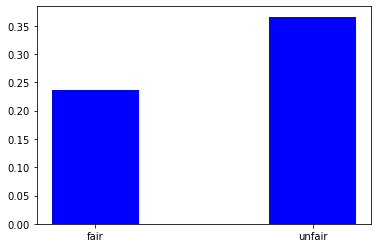

In [16]:
fair_rel_freq = 236/1000
unfair_rel_freq = 366/1000
freqs = [fair_rel_freq, unfair_rel_freq]
names = ['fair', 'unfair']
plt.bar(names, freqs, color='blue', width = 0.4);

## Scenario 2

In [17]:
fair_die = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1.change_weight(6, 5)
unfair_die_2.change_weight(1, 5)

fair_game_dice = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game_dice.play(10000)
unfair_game_dice = Game([fair_die, fair_die, unfair_die_1, unfair_die_1, unfair_die_2])
unfair_game_dice.play(10000)

fair_analyzer_dice = Analyzer(fair_game_dice)
unfair_analyzer_dice = Analyzer(unfair_game_dice)

fair_analyzer_dice.jackpot()

C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo_simulator\montecarlo_simulator.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo_simulator\montecarlo_simulator.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight


,1,2,3,4,5
Roll Number,,,,,
101,5,5,5,5,5
1198,1,1,1,1,1
1271,3,3,3,3,3
1647,3,3,3,3,3
3255,3,3,3,3,3
3762,3,3,3,3,3
4702,1,1,1,1,1
4856,4,4,4,4,4
5578,3,3,3,3,3


12

In [18]:
unfair_analyzer_dice.jackpot()

,1,2,3,4,5
Roll Number,,,,,
612,6,6,6,6,6
1009,1,1,1,1,1
2428,6,6,6,6,6
2715,6,6,6,6,6
4561,6,6,6,6,6
4774,1,1,1,1,1
5841,6,6,6,6,6
7452,6,6,6,6,6


8

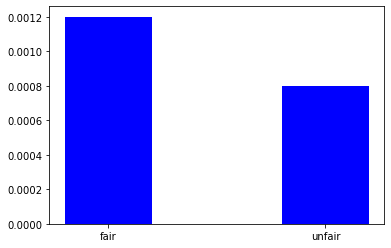

In [19]:
fair_rel_freq2 = 12/10000
unfair_rel_freq2 = 8/10000
freqs2 = [fair_rel_freq2, unfair_rel_freq2]
names2 = ['fair', 'unfair']
plt.bar(names2, freqs2, color='blue', width = 0.4);

In [20]:
fair_analyzer_dice.combo().head(10)

n
0 1 2 3 4     
2 3 4 5 6  178
1 2 3 5 6  169
      4 5  163
        6  149
    4 5 6  147
  3 4 5 6  147
  2 5 5 6   99
  1 2 4 5   99
  3 4 4 6   94
2 2 4 5 6   91

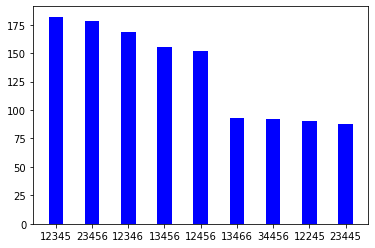

In [21]:
comb_freqs = [182, 178, 169, 168, 155, 152, 93, 92, 90, 88]
combs = ['12345', '23456', '12346', '12346', '13456', '12456', '13466', '34456', '12245', '23445']
plt.bar(combs, comb_freqs, color='blue', width=0.4);

In [22]:
unfair_analyzer_dice.combo().head(10)

n
0 1 2 3 4     
1 2 3 6 6  208
  4 5 6 6  207
  2 5 6 6  202
  3 5 6 6  196
    4 6 6  196
  2 4 6 6  194
      5 6  188
    3 4 6  177
  3 4 5 6  167
  2 3 5 6  162

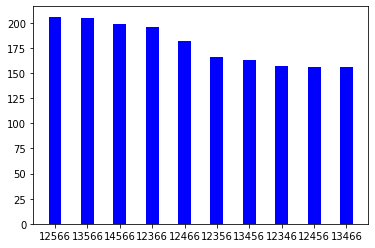

In [23]:
comb_freqs = [206, 205, 199, 196, 182, 166, 163, 157, 156, 156]
combs = ['12566', '13566', '14566', '12366', '12466', '12356', '13456', '12346', '12456', '13466']
plt.bar(combs, comb_freqs, color='blue', width=0.4);

## Scenario 3

In [25]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters = Die(np.array(alphabet))
freqs = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705,
 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544,
 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308,
 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

for i in range(len(freqs)):
    letters.change_weight(alphabet[i], freqs[i])
    
letter_game = Game([letters, letters, letters, letters, letters])
letter_game.play(1000)
df = letter_game.show_play_results('W').T
df

C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo\montecarlo.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo\montecarlo.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__die['W (weights)'][idx] = new_weight
C:\Users\Rachel\Documents\GitHub\DS5100-2022-06-Final\montecarlo\montecarlo.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,0,1,2,3,4
0,d,t,n,b,r
1,t,b,s,e,h
2,e,q,t,f,l
3,h,c,l,o,s
4,o,o,o,r,s
...,...,...,...,...,...
995,f,n,n,w,w
996,e,t,p,c,s
997,n,t,o,i,o
998,a,s,c,i,s


In [26]:
print(df.to_markdown())

|     | 0   | 1   | 2   | 3   | 4   |
|----:|:----|:----|:----|:----|:----|
|   0 | d   | t   | n   | b   | r   |
|   1 | t   | b   | s   | e   | h   |
|   2 | e   | q   | t   | f   | l   |
|   3 | h   | c   | l   | o   | s   |
|   4 | o   | o   | o   | r   | s   |
|   5 | e   | r   | e   | e   | c   |
|   6 | c   | r   | a   | e   | i   |
|   7 | t   | a   | e   | t   | t   |
|   8 | i   | t   | b   | c   | a   |
|   9 | i   | m   | t   | c   | p   |
|  10 | y   | i   | a   | r   | o   |
|  11 | o   | s   | d   | e   | e   |
|  12 | i   | k   | e   | r   | i   |
|  13 | r   | r   | o   | r   | e   |
|  14 | g   | e   | e   | e   | y   |
|  15 | i   | n   | y   | d   | r   |
|  16 | m   | g   | e   | n   | u   |
|  17 | p   | s   | j   | t   | i   |
|  18 | p   | r   | r   | s   | k   |
|  19 | h   | m   | m   | s   | m   |
|  20 | i   | t   | g   | p   | n   |
|  21 | w   | r   | f   | a   | p   |
|  22 | s   | e   | a   | s   | s   |
|  23 | w   | s   | d   | t   | m   |
|  24 | o   

Based on my eye count, the relative frequency is:

In [27]:
1/1000

0.001

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o
dir/

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [ ]:
Based on my eye count, the relative frequency is: